In [1]:
# https://github.com/tallesfelix/directions-with-osm-networkx/blob/master/Creating%20routes%20with%20networkx%20and%20ipyleaflet.ipynb
import networkx as nx
import osmnx as ox
from shapely.geometry import LineString, mapping
import geopandas as gpd
from ipyleaflet import *

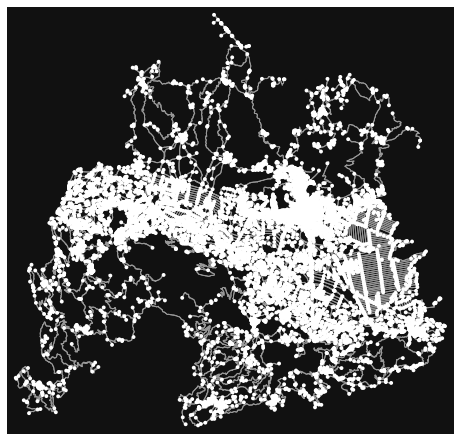

In [5]:
place_name = "Lamia, Fthiotida, Greece"
graph = ox.graph_from_place(place_name)
fig, ax = ox.plot_graph(graph)

In [15]:
nodes, edges = ox.graph_to_gdfs(graph)
nodes

,y,x,osmid,ref,highway,geometry
38072952,38.801899,22.560178,38072952,NaN,NaN,POINT (22.56018 38.80190)
283660194,38.796712,22.486603,283660194,NaN,NaN,POINT (22.48660 38.79671)
283661664,38.789686,22.487203,283661664,NaN,NaN,POINT (22.48720 38.78969)
286430117,38.909682,22.336055,286430117,NaN,NaN,POINT (22.33605 38.90968)
286430786,38.887055,22.471332,286430786,NaN,NaN,POINT (22.47133 38.88705)
...,...,...,...,...,...,...
8156583795,38.766648,22.449773,8156583795,NaN,NaN,POINT (22.44977 38.76665)
8156583800,38.794168,22.484200,8156583800,NaN,NaN,POINT (22.48420 38.79417)
8156583810,38.795586,22.485550,8156583810,NaN,NaN,POINT (22.48555 38.79559)
8227687488,38.922542,22.405637,8227687488,NaN,NaN,POINT (22.40564 38.92254)


In [17]:
center = (38.766648, 22.449773)
m = Map(center=center, basemap=basemaps.CartoDB.Positron, zoom=15)
m

Map(center=[38.766648, 22.449773], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title',…

In [8]:
edges

,osmid,oneway,lanes,name,highway,maxspeed,length,bridge,geometry,service,junction,access,tunnel,u,v,key
0,115615662,True,3,Αλίμου Κατεχάκη,primary,70,22.390,NaN,"LINESTRING (23.78470 37.98169, 23.78484 37.98152)",NaN,NaN,NaN,NaN,36453029,971025309,0
1,"[5209488, 45724961, 45724957, 605082008]",True,2,NaN,motorway_link,"[70, 40]",798.399,yes,"LINESTRING (23.79348 37.97343, 23.79354 37.973...",NaN,NaN,NaN,NaN,36453043,36243586,0
2,"[87886469, 224839494, 87886471]",True,"[3, 2]",Αλίμου Κατεχάκη,primary,70,524.846,NaN,"LINESTRING (23.79348 37.97343, 23.79362 37.973...",NaN,NaN,NaN,NaN,36453043,36454255,0
3,"[87886473, 46945314]",True,2,Αλίμου Κατεχάκη,primary,70,625.382,NaN,"LINESTRING (23.79270 37.97108, 23.79302 37.971...",NaN,NaN,NaN,NaN,36453928,1021379624,0
4,"[5209449, 605082004, 605082012, 605082013]",True,2,NaN,motorway_link,70,581.638,NaN,"LINESTRING (23.79270 37.97108, 23.79288 37.971...",NaN,NaN,NaN,NaN,36453928,36243586,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3559,169044893,True,2,Ούλωφ Πάλμε,secondary,NaN,29.862,NaN,"LINESTRING (23.76229 37.97793, 23.76214 37.97769)",NaN,NaN,NaN,NaN,8167775365,359026897,0
3560,661817514,False,NaN,NaN,footway,NaN,10.044,NaN,"LINESTRING (23.76229 37.97793, 23.76239 37.97789)",NaN,NaN,NaN,NaN,8167775365,8167775366,0
3561,267066382,True,2,Ούλωφ Πάλμε,secondary,NaN,30.233,NaN,"LINESTRING (23.76239 37.97789, 23.76254 37.97814)",NaN,NaN,NaN,NaN,8167775366,360015186,0
3562,483186193,False,NaN,NaN,footway,NaN,9.890,NaN,"LINESTRING (23.76239 37.97789, 23.76249 37.97784)",NaN,NaN,NaN,NaN,8167775366,4759401949,0


In [9]:
to_marker_style = AwesomeIcon(
    name='circle',
    icon_color='white',
    marker_color='red',
    spin=False
)
from_marker = Marker(location=center)
to_marker = Marker(location=center, icon=to_marker_style)

In [10]:
def set_nearest_node(marker):
 marker.nearest_node = ox.get_nearest_node(graph, marker.location)
 return

In [11]:
path_layer_list = []
def handle_change_location(event, marker):
    event_owner = event['owner']
    event_owner.nearest_node = ox.get_nearest_node(graph, event_owner.location)
    marker.nearest_node = ox.get_nearest_node(graph, marker.location)
    
    shortest_path = nx.dijkstra_path(graph, event_owner.nearest_node, marker.nearest_node, 
                                     weight='length')
    
    if len(path_layer_list) == 1:
        m.remove_layer(path_layer_list[0])
        path_layer_list.pop()
    
    shortest_path_points = nodes.loc[shortest_path]
    path = gpd.GeoDataFrame([LineString(shortest_path_points.geometry.values)], columns=['geometry'])
    path_layer = GeoData(geo_dataframe=path, style={'color':'black', 'weight':2})
    m.add_layer(path_layer)
    path_layer_list.append(path_layer)

In [12]:
from_marker.observe(lambda event: handle_change_location(event, to_marker), 'location')
to_marker.observe(lambda event: handle_change_location(event, from_marker), 'location')

In [13]:
m.add_layer(from_marker)
m.add_layer(to_marker)
set_nearest_node(from_marker)
set_nearest_node(to_marker)
m

Map(center=[37.969175, 23.778748], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title',…

In [14]:
n = Map(center=center, basemap=basemaps.CartoDB.Positron, zoom=15)
n

Map(center=[37.969175, 23.778748], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title',…

In [13]:
type(m)

ipyleaflet.leaflet.Map